Training with Adam optimizer
Training with RMSprop optimizer


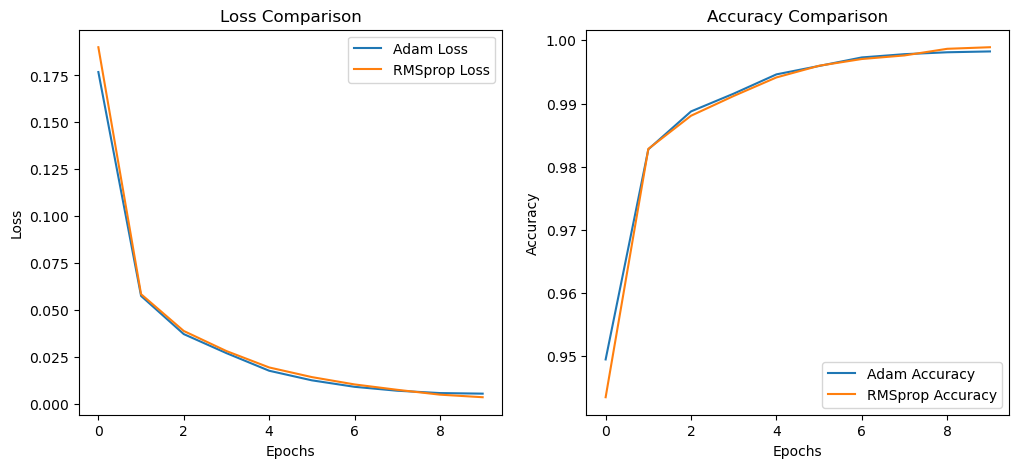

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define a simple CNN model
def build_model(optimizer):
    model = keras.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train models with Adam and RMSprop
optimizers = {'Adam': keras.optimizers.Adam(), 'RMSprop': keras.optimizers.RMSprop()}
history_dict = {}

for name, optimizer in optimizers.items():
    print(f"Training with {name} optimizer")
    model = build_model(optimizer)
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), verbose=0)
    history_dict[name] = history.history

# Plot loss and accuracy
plt.figure(figsize=(12, 5))

# Loss comparison
plt.subplot(1, 2, 1)
for name, history in history_dict.items():
    plt.plot(history['loss'], label=f'{name} Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison')
plt.legend()

# Accuracy comparison
plt.subplot(1, 2, 2)
for name, history in history_dict.items():
    plt.plot(history['accuracy'], label=f'{name} Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend()

plt.show()
